In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
from sklearn import neighbors, datasets 
%matplotlib inline

In [3]:
input_file = 'data.txt' 
data = np.loadtxt(input_file, delimiter=',') 
X, y = data[:, :-1], data[:, -1].astype(np.int32)

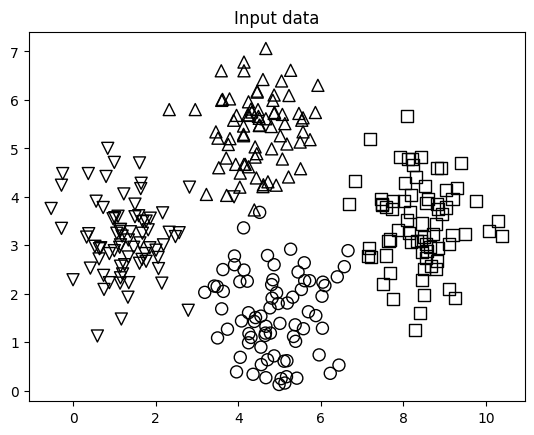

In [4]:
plt.figure() 
plt.title('Input data') 
marker_shapes = 'v^os' 
for i in range(X.shape[0]): 
    plt.scatter(X[i, 0], X[i, 1], marker=marker_shapes[y[i]],
                s=75, edgecolors='black', facecolors='none') 
plt.show()

In [5]:
num_neighbors = 12 

In [6]:
classifier = neighbors.KNeighborsClassifier(num_neighbors, weights='distance') 

In [7]:
classifier.fit(X, y)

KNeighborsClassifier(n_neighbors=12, weights='distance')

In [9]:
step_size = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), 
                                 np.arange(y_min, y_max, step_size))

In [10]:
output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

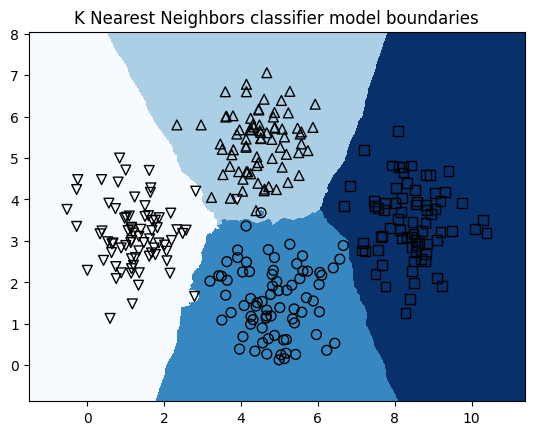

In [15]:
output = output.reshape(x_values.shape) 
plt.figure() 
plt.pcolormesh(x_values, y_values, output, cmap=cm.Blues) 
for i in range(X.shape[0]): 
    plt.scatter(X[i, 0], X[i, 1], marker=marker_shapes[y[i]],
                s=50, edgecolors='black', facecolors='none')
plt.xlim(x_values.min(), x_values.max()) 
plt.ylim(y_values.min(), y_values.max()) 
plt.title('K Nearest Neighbors classifier model boundaries') 
plt.show()

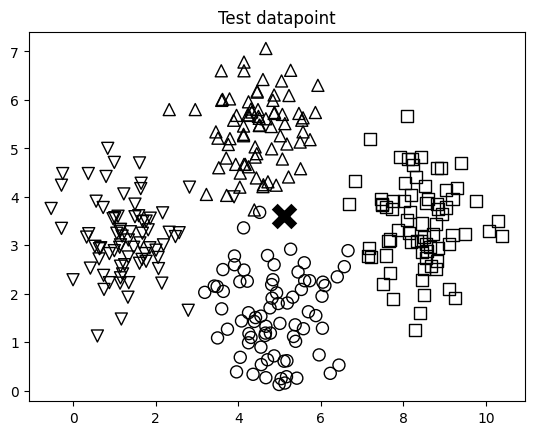

In [16]:
test_datapoint = [5.1, 3.6] 
plt.figure() 
plt.title('Test datapoint') 
for i in range(X.shape[0]): 
    plt.scatter(X[i, 0], X[i, 1], marker=marker_shapes[y[i]],
                s=75, edgecolors='black', facecolors='none') 
plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
            linewidth=6, s=200, facecolors='black') 
plt.show()

In [18]:
_, indices = classifier.kneighbors([test_datapoint]) 
indices = indices.astype(np.int32)[0] 

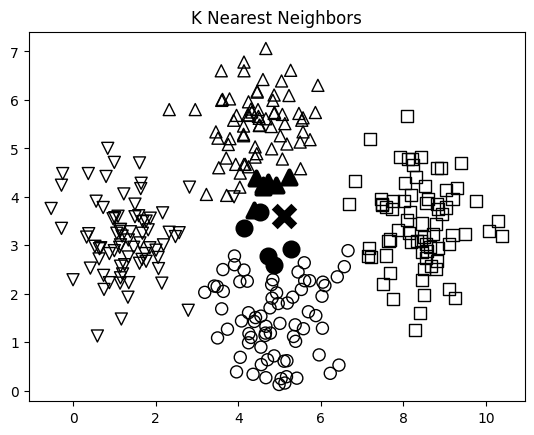

In [19]:
plt.figure() 
plt.title('K Nearest Neighbors') 
for i in indices:
    plt.scatter(X[i, 0], X[i, 1], marker=marker_shapes[y[i]],
                linewidth=3, s=100, facecolors='black') 
plt.scatter(test_datapoint[0], test_datapoint[1], marker='x', 
            linewidth=6, s=200, facecolors='black')
for i in range(X.shape[0]): 
    plt.scatter(X[i, 0], X[i, 1], marker=marker_shapes[y[i]],
                s=75, edgecolors='black', facecolors='none') 
plt.show()

In [22]:
print('K-Nearest Neighbours:')
for i in indices: 
    print('({},{}) -> {}'.format(X[i, 0], X[i, 1], y[i]))
print("Predicted output:", classifier.predict([test_datapoint])[0]) 

K-Nearest Neighbours:
(4.52,3.68) -> 2
(4.92,4.24) -> 1
(5.27,2.92) -> 2
(4.39,3.73) -> 1
(4.6,4.21) -> 1
(4.72,4.31) -> 1
(4.61,4.25) -> 1
(5.22,4.41) -> 1
(4.71,2.79) -> 2
(4.13,3.36) -> 2
(4.87,2.6) -> 2
(4.44,4.39) -> 1
Predicted output: 1
